# Decision tree

Decision tree is used to make decision based on given condition. For example, you're making decision on if you will like to go to gym today. You might think 1. do I get enough sleep? 2. Is my shoulder hurt? 3. If it's not crowded like have 20 people, I'll go. 4. Do I finish my work?

Same process apply anywhere.

## Demo

The dataset used in this notebook is a movie list.

I have a friend who once said to me:
> I don't want to spend my money to watch some romantic, animation, or poetic films in the theatre. It's a waste of money.

He also said that he wants to watch explosions, and a lot of visual effects and fights. He is a huge fan of Marvel movies, especially Iron man. He also watch *Justice League*, *Fast and Furious*, and more that you can think of. Very Hollywood alike.

Right now, suggest that it was in epidemic again and he wants me to recommend movies to him. Let's do it with decision tree implementation.

I will consider that:
- a duration of 2 hours
- ticket box with 50 million
- published no early than 2010
- budget with hundred million
- imdb scores are greater or equal to 7

will be a good criteria for a movie choice for him.

In [1]:
import pandas as pd

df = pd.read_csv('../data/Movie_Data.csv')
df = df[['duration', 'gross', 'budget', 'title_year', 'imdb_score']].dropna()

# map to boolean based on the condition

df['duration'] = df['duration'].apply(lambda x: 2 if x >= 120 else (1 if x>= 100 else 0))
# 0~50m: 0, ~100m: 1, ~200m: 2, 200m and up: 3
df['gross'] = df['gross'].apply(lambda x: 0 if x <= 50_000_000 else (1 if x <= 100_000_000 else (2 if x <= 200_000_000 else 3)) )
df['title_year'] = df['title_year'].ge(2010)
df['budget'] = df['budget'].apply(lambda x: 1 if x >= 100_000_000 else 0)

df.head()

,duration,gross,budget,title_year,imdb_score
0,2,3,1,False,7.9
1,2,3,1,False,7.1
2,2,3,1,True,6.8
3,2,3,1,True,8.5
5,2,1,1,True,6.6


Now, we get the column titles and also the score that we want to build a tree for:

In [2]:
x = df[df.columns[:4]]
features = list(x)
y = df['imdb_score'].ge(7)

All data is ready and mapped so far. We will use decision tree classifier and export a graph.

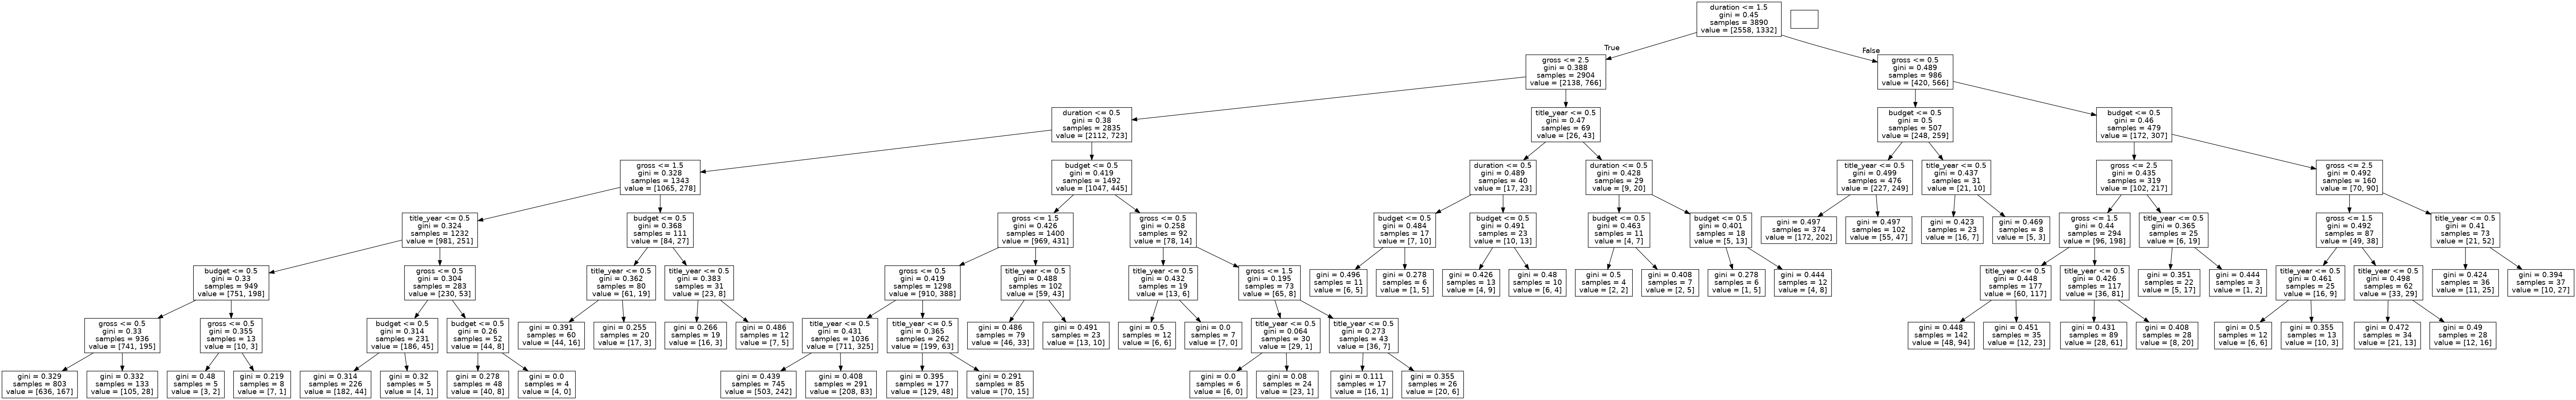

In [3]:
from IPython.display import Image
from six import StringIO
import pydot

from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(x, y)

dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data,
                         feature_names=features)
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

This decision tree seems underfitted as the entrophy (gini) of each step stays relatively high. It's close to 0.5. 

**It's best that it's closer to 0. 0 means no entropy! Entropy, in simple word, is difference.**


Our condition of 'budget', 'movie duration', and other columns seems biased. Even at bottom level of tree, the entrophy stays high. Let's try Random Forest and see if this will get better:

We'd build a Random Forest classifier. Plus, we'd use that to predict if he will like to watch *Sherlock Holmes: A Game of Shadows*

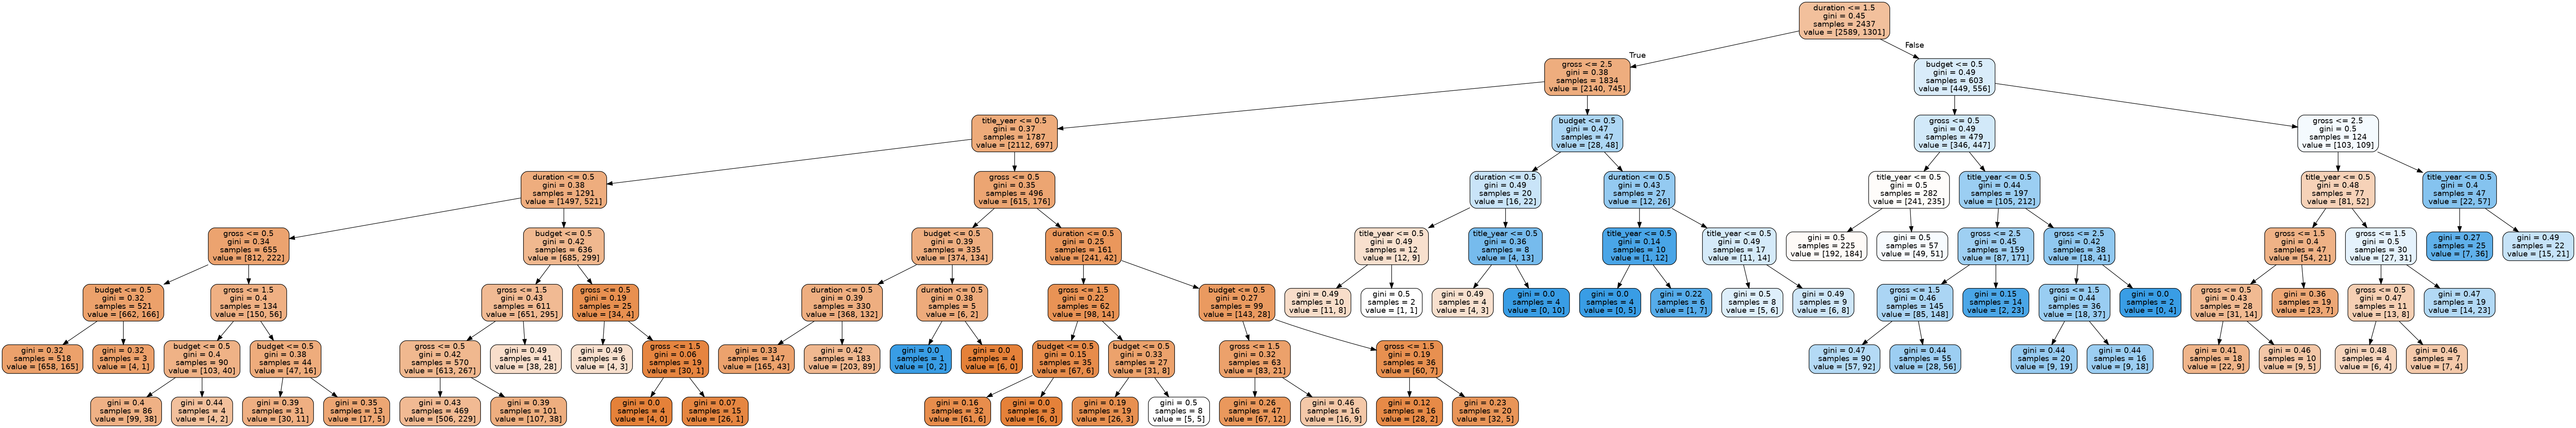

In [4]:
from sklearn.ensemble import RandomForestClassifier

random_clf = RandomForestClassifier(n_estimators=10)
random_clf.fit(x, y)
estimator = random_clf.estimators_[5]

tree.export_graphviz(estimator, out_file='tree.dot', 
                feature_names = features,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png'])

Image(filename = 'tree.png')

This model seems underfitted as well. But comparatively, it's slightly better than our decision tree. At some nodes, we achieve 0 or low entrophy.

Y is based on imdb score is greater or equal to 7. It seems that the columns of seleted, duration, budget, gross, etc., aren't the defied factor for high score in imdb. This output is expectable though. 

Lastly, let's use this model and see if he will watch *Sherlock Holmes: A Game of Shadows*

In [5]:
# 129 min
SH_duration = 2

# 186_830_669
SH_Gross = 2
# 2011
SH_TitleYear = True
# 125000000
SH_Budget = 1 

SH = pd.DataFrame([])

print('Will he watch Sherlock Holmes: A Game of Shadows? Predition:' )
print(random_clf.predict([[SH_duration, SH_Gross, SH_TitleYear, SH_Budget]]))

Will he watch Sherlock Holmes: A Game of Shadows? Predition:
[ True]


/home/derry/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
